### Student Details

Student Name: Ajith Antony Shanthi

Student ID: 24219169

# Task 2: Probability Theory

## Option ? (which option did you pick?)

**Example 1 for the Discrete random variable:**

I am going to find out the probability of a basketball player scoring a basket using Binomial Distribution or the Discrete random variable.

**Example 2 for the Continuous random variable:**

I am going to find out the probability of people using bus as their mode of transportation using Normal Distribution or the Continuous random variable.

## Approach

I have chosen my own example to perform Binomial distribution or the Discrete Random variable in showing the chances of a basketball player scoring a basket and missing the basket and calculate the normal distribution of people using bus with respect to hours.

I am going to take 3 parameters which are,
Binomial:
1. No_of_games
2. Shots_attempted
3. probability_Of_Scoring

Assuming a player scoring 80% of the shots in 100 games by attempting 30 shots in a game, I am simulatign the number of baskets made in each game.

Normal:
1. avgPeople_usingBus
2. stdDeviation_people
3. No_of_hours

Am calling the numpy,seaborn and matplotlib libraries.
1. numpy for the mathematical calculations such calling np.random.binomial() function.
2. seaborn and matplotlib.pyplot for the data visualisation.

## Manual Calculations

**Binomial Distribution:**
*Binomial or the Discrete random variable distribution is used to calculate the countable values.*


We nee 3 parameters to calculate the random variable
np.random.binomial(n,p,size)
 = np.random.binomial(30,0.8,1000)
n-no of trails in scoring a basket
p-the probability of scoring
size-the total number of games that we are considering in the range.

Mean= n.p [30*0.8]=24
Variance= n.p.(1-P) = (30)*(0.8)*(1-0.8)=24*0.2 = 4.8
Standard Deviation= Sq.root of variance : (i.e Sq.root(4.8)=2.18aprox


Discrete Random Variable of a player scoring:
Baskets Value Expected in a game: 24.118
Standard deviation: 2.167043146778578


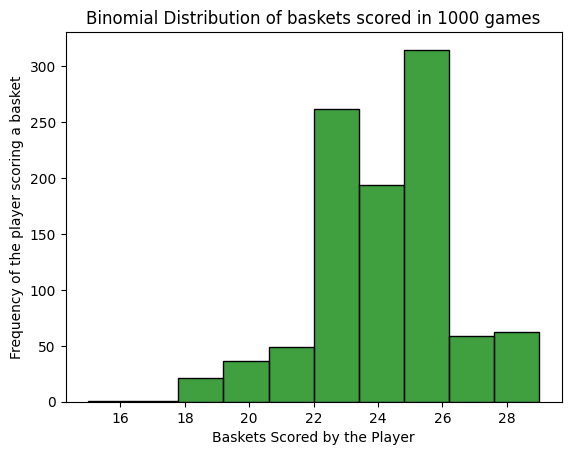

In [53]:
# Binomial Distribution of Discrete Random variable
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

np.random.seed(60)
No_of_games = 1000
Shots_attempted = 30
probability_of_Scoring = 0.8 #Assuming the player to score 80% of the time

# Let us calculate the baskets scored
baskets_Scored = np.random.binomial(Shots_attempted,probability_of_Scoring, No_of_games)

#Calculating the mean and standard deviations of the baskets scored
Exptd_baskets_Scored = np.mean(baskets_Scored)
Std_baskets_Scored = np.std(baskets_Scored)

print(f"Discrete Random Variable of a player scoring:")
print(f"Baskets Value Expected in a game: {Exptd_baskets_Scored}")
print(f"Standard deviation: {Std_baskets_Scored}")

#We need to provide the visual representation of the distribution
#Use histplot to create the histogram
sb.histplot(baskets_Scored, bins=10, kde=False, color= 'green') #kde is the Kinetic Density Estimate
plt.title("Binomial Distribution of baskets scored in 1000 games")
plt.xlabel("Baskets Scored by the Player")
plt.ylabel("Frequency of the player scoring a basket")
plt.show()



Number of people using bus:
Average number of people using bus per hour: {999.8740529899615}
Standard Deviation: {29.9626019557624}


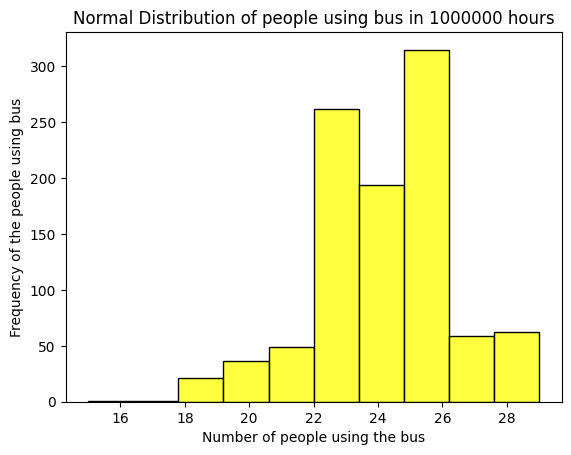

In [54]:
#Normal Distribution or the Continuous Random Variable
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

avgPeople_usingBus = 1000
stdDeviation_people = 30
No_of_hours = 100000

#Simulating the parameters
people_usingBus = np.random.normal(avgPeople_usingBus,stdDeviation_people,No_of_hours)

people_usingBus = np.maximum(0,people_usingBus)

#Calculating the mean and standard deviations of the people using bus
Mean_value = np.mean(people_usingBus)
StdDeviation_value = np.std(people_usingBus)

print(f"Number of people using bus:")
print(f"Average number of people using bus per hour:",{Mean_value})
print(f"Standard Deviation:", {StdDeviation_value})

#We need to provide the visual representation of the distribution
#Use histplot to create the histogram
sb.histplot(baskets_Scored, bins=10, kde=False, color= 'yellow') #kde is the Kinetic Density Estimate
plt.title("Normal Distribution of people using bus in 1000000 hours")
plt.xlabel("Number of people using the bus")
plt.ylabel("Frequency of the people using bus")
plt.show()



# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [55]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=7)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889


### Visualise

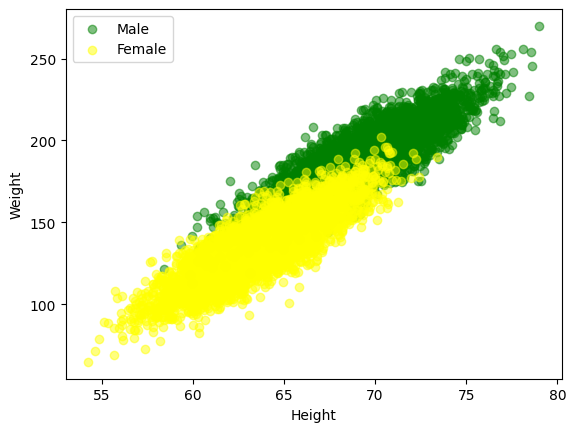

In [56]:
################################
male = data[data['Gender'] == 'Male']
female = data[data['Gender'] == 'Female']

plt.scatter(male['Height'], male['Weight'], color='green', label='Male', alpha=0.5)
plt.scatter(female['Height'], female['Weight'], color='yellow', label='Female', alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

###### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [57]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [58]:
################################
# Your code here
X = data[['Height', 'Weight']]
y = data['Gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=43) #random state 42 ensures that the train-test split will be the same each time the code is run.

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [59]:
from sklearn.naive_bayes import GaussianNB

################################
# Your code here
gauss = GaussianNB()
gauss.fit(X_train, y_train)

GaussianNB()

### Test the algorithm
Using the test data

In [60]:
from sklearn.metrics import accuracy_score

################################
# Your code here
y_pred = gauss.predict(X_test)
gaussian_nb_test_score = accuracy_score(y_test, y_pred)
print("Accuracy of GaussianNB:", gaussian_nb_test_score)

Accuracy of GaussianNB: 0.8916666666666667


### Plot the random samples

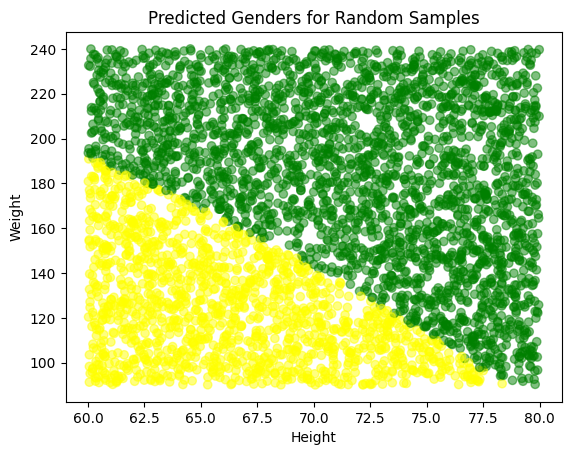

In [61]:
################################
# Your code here
sample_heights = np.random.uniform(60, 80, 4000)
sample_weights = np.random.uniform(90, 240, 4000)
samples = pd.DataFrame({'Height': sample_heights, 'Weight': sample_weights})
predicted_genders = gauss.predict(samples)

plt.scatter(samples['Height'], samples['Weight'], c=['green' if gender == 'Male' else 'yellow' for gender in predicted_genders], alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Predicted Genders for Random Samples')
plt.show()